# First steps with DataFrames.jl

### Bogumił Kamiński

In this notebook we will reproduce the classical Anscombe's quartert plot.

Our objective is to produce a figure similar to this one (the plot is taken from https://upload.wikimedia.org/wikipedia/commons/e/ec/Anscombe%27s_quartet_3.svg):

![Anscombe's quartet](https://upload.wikimedia.org/wikipedia/commons/e/ec/Anscombe%27s_quartet_3.svg)

We start with loading of the required packages

In [6]:
#] activate .

In [1]:
using DataFrames

In [3]:
using Statistics

In [7]:
#I always get an error when not doing this before using PyPlot, so we need to execute this ebfore
using Pkg
ENV["PYTHON"]=""
Pkg.build("PyCall")

    Building Conda ─→ `C:\Users\roell\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\b19db3927f0db4151cb86d073689f2428e524576\build.log`
    Building PyCall → `C:\Users\roell\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\9816a3826b0ebf49ab4926e2b18842ad8b5c8f04\build.log`
Precompiling project...
           ✗ CSV
  0 dependencies successfully precompiled in 44 seconds. 127 already precompiled.
  1 dependency errored.
  For a report of the errors see `julia> err`. To retry use `pkg> precompile`


In [9]:
using PyPlot

<div class="alert alert-block alert-info">
    <p><b>PyPlot.jl configuration:</b></p>
    <p>In some environments automatic installation of PyPlot.jl might fail. If you encounter this ussue please refer to <a href="https://github.com/JuliaPy/PyPlot.jl#installation">the PyPlot.jl installation instructions</a>. </p>
</div>

In particular typically executing the following commands:

```
using Pkg
ENV["PYTHON"]=""
Pkg.build("PyCall")
```

should resolve the PyPlot.jl installation issues. However, on OS X sometimes more configuration steps are required. You can find the detailed instructions [here](https://github.com/JuliaPy/PyPlot.jl#os-x).

In [11]:
#for generalised linear regression models
using GLM

This is a matrix in which we store 8 columns representing Anscombe's quartet data.

In [13]:
aq = [10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
       8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
      13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
       9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
      11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
      14.0   9.96  14.0  8.1   14.0   8.84   8.0   7.04
       6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
       4.0   4.26   4.0  3.1    4.0   5.39  19.0  12.50 
      12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
       7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
       5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89]

11×8 Matrix{Float64}:
 10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
  8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
 13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
  9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
 11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
 14.0   9.96  14.0  8.1   14.0   8.84   8.0   7.04
  6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
  4.0   4.26   4.0  3.1    4.0   5.39  19.0  12.5
 12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
  7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
  5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

We can simply convert a maxtrx to a `DataFrame` by calling its constructor

In [15]:
# just put auto so that the matrix should be converted using automated column names
df = DataFrame(aq, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


Note that the auto-generated column names are `x1`, `x2`, etc.

Next we replace automatically generated column names by proper ones.

In [17]:
#let's however create new names

#we are using a broadcasted (.) string function and paste x,y and 1-4 there
#using the vector function to get a vector out of it!
newnames = vec(string.(["x", "y"], [1 2 3 4]))

8-element Vector{String}:
 "x1"
 "y1"
 "x2"
 "y2"
 "x3"
 "y3"
 "x4"
 "y4"

In [19]:
# bang = will be muated 
# no band = will get a new object (so past object will not be mutated)
rename!(df, newnames)

Row,x1,y1,x2,y2,x3,y3,x4,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


We could have also assigned the names to columns at the moment of data frame creation like this:

In [21]:
#we can also past symbols as column names - so we can use symbols or strings
DataFrame(aq, [:x1, :y1, :x2, :y2, :x3, :y3, :x4, :y4])

Row,x1,y1,x2,y2,x3,y3,x4,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


> You might have noticed that in the first example we used a string (e.g. `"x1"`) as column name and in the second one we used a `Symbol` (e.g. `:x1`). This was intentional. DataFrames.jl allows you to use either of them for column indexing.

To see the above rule at work let us extract the second column `:y1` from this data frame. Here are several options how you can do it:

In [23]:
#extracting y1 from the dataframe - symbol
df.y1

11-element Vector{Float64}:
  8.04
  6.95
  7.58
  8.81
  8.33
  9.96
  7.24
  4.26
 10.84
  4.82
  5.68

In [25]:
#extracting y1 from the dataframe - string
df."y1"

11-element Vector{Float64}:
  8.04
  6.95
  7.58
  8.81
  8.33
  9.96
  7.24
  4.26
 10.84
  4.82
  5.68

In [27]:
#I want all rows but only one specific column
df[:, :y1]

11-element Vector{Float64}:
  8.04
  6.95
  7.58
  8.81
  8.33
  9.96
  7.24
  4.26
 10.84
  4.82
  5.68

In [29]:
#in this case, we want second row and column y1
df[2, "y1"]

6.95

Assume that now we want to reorder columns of the data frame `df` in-place by first grouping the "x"-columns and then "y" columns.

This can be easily achieved with the `select!` function.

Note that in column selection we can in particular use regular expressions like `r"x"` (matching all columns that have `"x"` in their name) and `:` which matches all columns (in this case only columns not having `"x"` in ther name are left)

In [31]:
#we order so that we have all the x columns in the front
#then we put the rest (:) in the back

select!(df, r"x", :)

Row,x1,x2,x3,x4,y1,y2,y3,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47
6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04
7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25
8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5
9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56


Note that we could have used `select` instead of `select!` function to create a new data frame (instead of mutating the data frame in question in-place).

An interesting feature of Anscombe's quartet is that its variables have the same mean and variance.

We can easily check this using the `describe` function.

In [33]:
#get some describtive stats
describe(df, mean => :mean, std => :std)

Row,variable,mean,std
,Symbol,Float64,Float64
1,x1,9.0,3.31662
2,x2,9.0,3.31662
3,x3,9.0,3.31662
4,x4,9.0,3.31662
5,y1,7.50091,2.03157
6,y2,7.50091,2.03166
7,y3,7.5,2.03042
8,y4,7.50091,2.03058


Just to practice the string/`Symbol` duality let us write the same using strings for column names:

In [17]:
#we can also do it with strings
describe(df, mean => "mean", std => "std")

Row,variable,mean,std
,Symbol,Float64,Float64
1,x1,9.0,3.31662
2,x2,9.0,3.31662
3,x3,9.0,3.31662
4,x4,9.0,3.31662
5,y1,7.50091,2.03157
6,y2,7.50091,2.03166
7,y3,7.5,2.03042
8,y4,7.50091,2.03058


Now let us add a new column `id` to the data frame that will just index its rows from 1 to number of rows.

In [39]:
#let's create a new variable representing the index (counting the rows)
df.id = 1:nrow(df) # also writing axes(df, 1) on the right hand side would work
df

Row,x1,x2,x3,x4,y1,y2,y3,y4,id
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58,1
2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76,2
3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71,3
4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84,4
5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47,5
6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04,6
7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25,7
8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5,8
9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56,9


Similarly to `nrow` which gives us a number of rows in a data frame, one can use `ncol` function to get its number of columns.

In [41]:
ncol(df)

9

In order to practice what we have already learnt let us create a new data frame which will have `:id` coumn in front of the remaining columns.

In [43]:
select(df, "id", :)

Row,id,x1,x2,x3,x4,y1,y2,y3,y4
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
2,2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
3,3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
4,4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
5,5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47
6,6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04
7,7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25
8,8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5
9,9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56


Note that this time `df` data frame was not changed, as `select` makes a copy.

In [45]:
df

Row,x1,x2,x3,x4,y1,y2,y3,y4,id
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58,1
2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76,2
3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71,3
4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84,4
5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47,5
6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04,6
7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25,7
8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5,8
9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56,9


It is also easy to transform a data frame back to a matrix using the `Matrix` function.

In [47]:
Matrix(df)

11×9 Matrix{Float64}:
 10.0  10.0  10.0   8.0   8.04  9.14   7.46   6.58   1.0
  8.0   8.0   8.0   8.0   6.95  8.14   6.77   5.76   2.0
 13.0  13.0  13.0   8.0   7.58  8.74  12.74   7.71   3.0
  9.0   9.0   9.0   8.0   8.81  8.77   7.11   8.84   4.0
 11.0  11.0  11.0   8.0   8.33  9.26   7.81   8.47   5.0
 14.0  14.0  14.0   8.0   9.96  8.1    8.84   7.04   6.0
  6.0   6.0   6.0   8.0   7.24  6.13   6.08   5.25   7.0
  4.0   4.0   4.0  19.0   4.26  3.1    5.39  12.5    8.0
 12.0  12.0  12.0   8.0  10.84  9.13   8.15   5.56   9.0
  7.0   7.0   7.0   8.0   4.82  7.26   6.42   7.91  10.0
  5.0   5.0   5.0   8.0   5.68  4.74   5.73   6.89  11.0

We will use this feature to determine a plotting range for our data.

 We take the extrema respectively of the "x" and "y" variables, add padding equal to 1, and finally collect them to vectors (without calling the `collect` our result would be a `Tuple`)

In [51]:
#we take our extreme values
#we only look at values that are in one of the x columns and add a padding equal to 1
xlims = collect(extrema(Matrix(select(df, r"x"))) .+ (-1, 1))

2-element Vector{Float64}:
  3.0
 20.0

In [53]:
#now we do the same for all the columns that start with a y
ylims = collect(extrema(Matrix(select(df, r"y"))) .+ (-1, 1))

2-element Vector{Float64}:
  2.1
 13.74

Now we are ready to produce the final plots.

Note that the GLM.jl package is integrated with DataFrames.jl and in `lm` and `predict` functions we can use data frame objects to pass data.

Note though that as GLM.jl in general supports other tabular types than just DataFrames.jl it is more strict and accepts only `Symbol`s as column names (this is required when we use the `term` function).

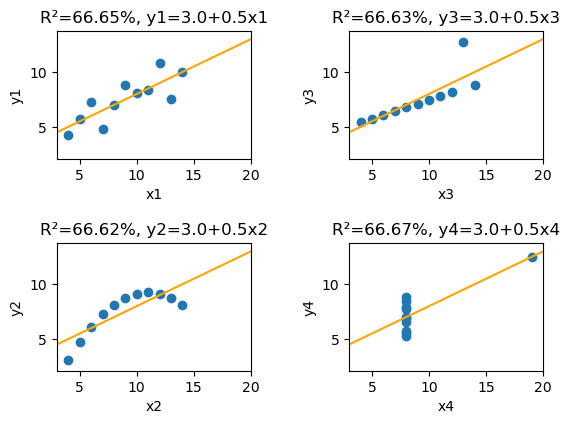

In [55]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=4.0)
for i in 1:4
    x = Symbol("x", i)
    y = Symbol("y", i)
    model = lm(term(y)~term(x), df)
    axs[i].plot(xlims, predict(model, DataFrame(x => xlims)), color="orange")
    axs[i].scatter(df[:, x], df[:, y])
    axs[i].set_xlim(xlims)
    axs[i].set_ylim(ylims)
    axs[i].set_xlabel("x$i")
    axs[i].set_ylabel("y$i")
    a, b = round.(coef(model), digits=2)
    c = round(100 * r2(model), digits=2)
    axs[i].set_title(string("R²=$c%, $y=$a+$b$x"))
end

We note that in all cases the estimated models have exactly the same R² and estimated coefficients.

It is worth to highlight several important features of DataFrames.jl package functionality that we used in the above example.

First, it is easy to create a data frame from variables holding column names and values using `=>`. Here is one more example how this functionality can be used:

In [57]:
x = :var1
y = :var2
xc = 1:3
yc = 4:6
DataFrame(x => xc, y => yc)

Row,var1,var2
,Int64,Int64
1,1,4
2,2,5
3,3,6


Note that the same effect can be achieved with passing keyword arguments directly to `DataFrame` constructor:

In [59]:
DataFrame(var1=xc, var2=yc)

Row,var1,var2
,Int64,Int64
1,1,4
2,2,5
3,3,6


Another thing you might have noticed is the use of `df[:, x]` and `df[:, y]` indexing expressions to get columns from a data frame. Let us comment on the differences between `df.col` and `df[:, col]` syntaxes that we discussed above:

In [28]:
# gives you a direct access to the column stored in `df` but x1 is a literal
df.x1

11-element Vector{Float64}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

In [29]:
# now the column is copied, so this is the same as copy(df.x1)
# in this case we could have used a variable instead of a literal for indexing
df[:, :x1]

11-element Vector{Float64}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

So what if you want to select a column without copying it but want to use a variable holding its name. There is a special `!` row selector for this:

In [61]:
n = :x1

:x1

In [62]:
v = df[!, n]

11-element Vector{Float64}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

Let us check that `!` does not copy:

In [63]:
v === df.x1

true

Indexing of a data frame is very flexible. All rules governing this functionality can be found at https://juliadata.github.io/DataFrames.jl/stable/lib/indexing/.